In [107]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

x_val = train_images[:20000]
partial_x_train = train_images[20000:]

y_val = train_labels[:20000]
partial_y_train = train_labels[20000:]


network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))
test_loss, test_acc = network.evaluate(test_images, test_labels)

Train on 40000 samples, validate on 20000 samples
Epoch 1/20
40000/40000 [==============================] - 3s 69us/step - loss: 0.3048 - acc: 0.9124 - val_loss: 0.1735 - val_acc: 0.9485
Epoch 2/20
40000/40000 [==============================] - 2s 57us/step - loss: 0.1298 - acc: 0.9625 - val_loss: 0.1253 - val_acc: 0.9634
Epoch 3/20
40000/40000 [==============================] - 2s 54us/step - loss: 0.0869 - acc: 0.9737 - val_loss: 0.1037 - val_acc: 0.9690
Epoch 4/20
40000/40000 [==============================] - 2s 57us/step - loss: 0.0623 - acc: 0.9813 - val_loss: 0.0921 - val_acc: 0.9728
Epoch 5/20
40000/40000 [==============================] - 3s 70us/step - loss: 0.0470 - acc: 0.9856 - val_loss: 0.0914 - val_acc: 0.9738
Epoch 6/20
40000/40000 [==============================] - 3s 66us/step - loss: 0.0352 - acc: 0.9901 - val_loss: 0.0830 - val_acc: 0.9759
Epoch 7/20
40000/40000 [==============================] - 2s 57us/step - loss: 0.0271 - acc: 0.9922 - val_loss: 0.0808 - val_acc

In [108]:
print('test_acc:', test_acc)

test_acc: 0.9791


In [109]:
history_dict = history.history

In [110]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

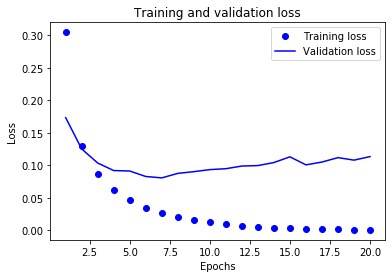

In [112]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

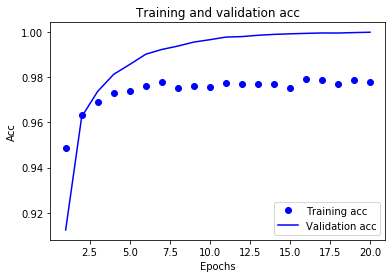

In [114]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, val_acc, 'bo', label='Training acc')
plt.plot(epochs, acc, 'b', label='Validation acc')

plt.title('Training and validation acc')

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend()

plt.show()

In [116]:
predictions = network.predict(test_images)

In [117]:
print(predictions)

[[9.8504163e-15 4.4044121e-19 6.9467300e-14 ... 1.0000000e+00
  2.5261786e-16 2.6084461e-09]
 [8.2185596e-24 7.0817517e-19 1.0000000e+00 ... 0.0000000e+00
  8.9234993e-19 6.4330608e-37]
 [5.4366743e-13 9.9999976e-01 1.4050053e-09 ... 1.2892981e-07
  1.7875072e-07 4.4454165e-13]
 ...
 [8.1933564e-25 2.1775243e-19 5.4661699e-22 ... 5.9764580e-12
  7.2663251e-13 6.4216041e-09]
 [1.2693394e-19 6.0714661e-23 1.1456428e-25 ... 1.3740422e-22
  3.2767455e-09 7.7518490e-23]
 [5.4677366e-21 5.3190061e-32 2.5756806e-22 ... 5.8290143e-30
  1.8452799e-26 1.2608936e-27]]


In [118]:
predictions[0].shape

(10,)

In [119]:
np.sum(predictions)

10000.0

In [128]:
np.argmax(predictions[5])

1

In [141]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

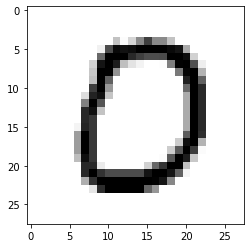

In [152]:
tes = test_images[10]

plt.imshow(dt, cmap=plt.cm.binary)
plt.show()

In [154]:
np.argmax(predictions[10])

0